In [5]:
#Import dependants
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import us
from pathlib import Path
from datetime import datetime

(to find the full names of the states for shd_df, I had to import "us". To do this, type "pip install us" on a random cell, once installed, delete and then restart kernel to use)

# Data Cleaning
### Preparing for Analysis

In [6]:
CSV1Kpath = Path("Kaggle1DS.csv")
CSV2Kpath = Path("Kaggle2DS.csv")
CSV3Xpath = Path("SHD.csv")
CSV1KR = pd.read_csv(CSV1Kpath)
CSV2KR = pd.read_csv(CSV2Kpath)
CSV3XR = pd.read_csv(CSV3Xpath)

In [7]:
#Data frames
kaggle_1_df = pd.DataFrame(CSV1KR)
kaggle_2_df = pd.DataFrame(CSV2KR)
shd_df = pd.DataFrame(CSV3XR)

### Cleaning Kaggle 1 df

In [8]:
#kaggle_1_df

In [9]:
# Organizing columns in desired order #update: took out address
clean_1_df = pd.DataFrame(kaggle_1_df[["school","type","year","date","time","city","state","urbanrural","race","killed","injured","victims","LONCOD","LATCOD"]])

# Convert "Date" column to datetime
clean_1_df["date"] = pd.to_datetime(clean_1_df["date"])

# Format the 'Date' column for display
clean_1_df["date"] = clean_1_df["date"].dt.strftime('%m/%d/%Y')

# Renaming the columns
clean_1_df.rename(columns={"urbanrural": "City Type", "LONCOD": "Longitude","LATCOD": "Latitude"}, inplace=True)

# Proper case the columns
clean_1_df.columns = [col.title() if col.islower() else col for col in clean_1_df]

# Proper case the rows
clean_1_df = clean_1_df.map(lambda x: x.title() if isinstance(x, str) else x)

# Replace NaN with "Unknown"
clean_1_df = clean_1_df.fillna("Unknown")


# Adding the newly labeled data into a new csv for cleanliness
#clean_1_path = Path("clean 1.csv")
#clean_1_df.to_csv(clean_1_path, index=False)

clean_1_df

/var/folders/rz/6tnzmsj50s75hgrnq67ygmm00000gn/T/ipykernel_24258/544356552.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_1_df["date"] = pd.to_datetime(clean_1_df["date"])


,School,Type,Year,Date,Time,City,State,City Type,Race,Killed,Injured,Victims,Longitude,Latitude
0,William Penn High School,High School,2009,01/08/2009,8:30Pm,New Castle,Delaware,Suburbtown,Black,0,1,1,-75.5849,39.6681
1,Dunbar Vocational Career Academy,High School,2009,01/09/2009,8:00Pm,Chicago,Illinois,Urban,Black,0,5,5,-87.6175,41.8399
2,Cahokia High School,High School,2009,01/23/2009,7:20Pm,Cahokia,Illinois,Suburbtown,Black,1,0,1,-90.1651,38.5657
3,Zebulon Middle School,Middle School,2009,02/11/2009,6:00Am,Zebulon,North Carolina,Suburbtown,Black,0,1,1,-78.3118,35.8315
4,Central High School,High School,2009,02/17/2009,2:20Pm,Detroit,Michigan,Urban,Unknown,0,1,1,-83.113977,42.383593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Denali Elementary School,Elementary School,2018,10/03/2018,9:30Am,Anchorage,Alaska,Urban,White,0,1,1,-149.881113,61.213281
176,Varina High School,High School,2018,10/07/2018,9:30Pm,Henrico,Virginia,Rural,Black,0,1,1,-77.378427,37.471892
177,Butler High School,High School,2018,10/29/2018,7:15Am,Matthews,North Carolina,Suburbtown,White,1,0,1,-80.691593,35.120282
178,Simonsdale Elementary School,Elementary School,2018,11/20/2018,4:00Pm,Portsmouth,Virginia,Urban,White,0,1,1,-76.382449,36.826811


### Cleaning Kaggle 2 df

In [10]:
#kaggle_2_df

In [11]:
# Organizing available columns in desired order
clean_2_df = pd.DataFrame(kaggle_2_df[["school","year","date","time","city","state","killed","injured","long","lat","weapon",
                                       "weapon_source","age_shooter1","gender_shooter1","race_ethnicity_shooter1","shooter_relationship1"]])

# Convert "Date" column to datetime
clean_2_df["date"] = pd.to_datetime(clean_2_df["date"])

# Format the 'Date' column for display
clean_2_df["date"] = clean_2_df["date"].dt.strftime("%m/%d/%Y")

# Renaming the columns
clean_2_df.rename(columns={"long": "Longitude","lat": "Latitude","weapon_source":"Weapon Source", "age_shooter1":"Age",
                           "race_ethnicity_shooter1":"Race",}, inplace=True)

# Proper case the columns
clean_2_df.columns = [col.title() if col.islower() else col for col in clean_2_df]

# Proper case the rows
clean_2_df = clean_2_df.map(lambda x: x.title() if isinstance(x, str) else x)


# Extract school type from the 'School' column and put it in the 'Type' column
clean_2_df.loc[clean_2_df["School"].str.contains("High School", case=False, na=False), "Type"] = "High School"
clean_2_df.loc[clean_2_df["School"].str.contains("Middle School", case=False, na=False), "Type"] = "Middle School"
clean_2_df.loc[clean_2_df["School"].str.contains("Elementary School", case=False, na=False), "Type"] = "Elementary School"
clean_2_df.loc[clean_2_df["School"].str.contains("Junior High", case=False, na=False), "Type"] = "Middle School"


# Rearranging new columns and the first dataframe into desired order
clean_2_df = pd.DataFrame(clean_2_df[["School","Type","Year","Date","Time","City","State","Race","Killed","Injured",
                                     "Longitude","Latitude",
                                      "Weapon","Weapon Source","Age","Gender_Shooter1","Shooter_Relationship1"]])

# Replace NaN with "Unknown"
clean_2_df = clean_2_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
#clean_2_path = Path("clean 2.csv")
#clean_2_df.to_csv(clean_2_path, index=False)

clean_2_df

,School,Type,Year,Date,Time,City,State,Race,Killed,Injured,Longitude,Latitude,Weapon,Weapon Source,Age,Gender_Shooter1,Shooter_Relationship1
0,Columbine High School,High School,1999,04/20/1999,11:19 Am,Littleton,Colorado,W,13,21,-105.075,39.60391,12-Gauge Savage-Springfield 67H Pump-Action Sh...,Purchased From Friends,18.0,M,Student
1,Scotlandville Middle School,Middle School,1999,04/22/1999,12:30 Pm,Baton Rouge,Louisiana,Unknown,0,1,-91.169966,30.529958,.22 Caliber Pistol,Unknown,14.0,M,Former Student (Expelled)
2,Heritage High School,High School,1999,05/20/1999,8:03 Am,Conyers,Georgia,W,0,6,-84.04796,33.626922,".22 Caliber Rifle, 357-Caliber Magnum Handgun",Unknown,15.0,M,Student
3,John Bartram High School,High School,1999,10/04/1999,10:00 Am,Philadelphia,Pennsylvania,Unknown,0,1,-75.234108,39.921509,Rg .25-Caliber Pistol,Purchased From Friend,17.0,M,Student
4,Dorchester High School,High School,1999,11/03/1999,7:40 Am,Boston,Massachusetts,Unknown,0,1,-71.075901,42.285268,Unknown,Unknown,Unknown,M,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,E. Washington Rhodes Elementary School,Elementary School,2023,05/08/2023,11:30 Am,Philadelphia,Pennsylvania,Unknown,0,0,-75.1781,40.0028,Unknown,Unknown,Unknown,Unknown,Student
383,Roosevelt High School,High School,2023,05/17/2023,2:25 Pm,Washington,District Of Columbia,Unknown,1,0,-77.029177,38.942971,Unknown,Unknown,Unknown,Unknown,Unknown
384,St. John'S Prep,nan,2023,05/22/2023,Unknown,Danvers,Massachusetts,Unknown,0,0,-70.952603,42.582682,Unknown,Unknown,Unknown,M,Police Officer
385,Oliver Citywide Academy,nan,2023,05/24/2023,7:30 Am,Pittsburgh,Pennsylvania,Unknown,1,0,-80.024121,40.464327,Unknown,Unknown,15.0,M,Student


### Cleaning shd_df

In [12]:
#shd_df

In [13]:
# Organizing available columns in desired order
clean_3_df = pd.DataFrame(shd_df[["school","School_Level","Date","City","State","First_Shot","Bullied","Domestic_Violence","Gang_Related","Preplanned","Quarter","Location"]])

# Convert "Date" column to datetime
clean_3_df["Date"] = pd.to_datetime(clean_3_df["Date"])

# Create the "Year" column by extracting the year from the "Date" column
clean_3_df['Year'] = clean_3_df['Date'].dt.year

# Format the 'Date' column for display
clean_3_df["Date"] = clean_3_df["Date"].dt.strftime('%m/%d/%Y')

# Renaming the columns
clean_3_df.rename(columns={"School_Level": "Type","First_Shot": "Time"}, inplace=True)

# Proper case the columns
clean_3_df.columns = [col.title() if col.islower() else col for col in clean_3_df]

#"weapon", "weapon_source","age_shooter1","gender_shooter1","race_ethnicity_shooter1","shooter_relationship1"

# Extract school type from the 'School' column and put it in the 'Type' column
clean_3_df.loc[clean_3_df["School"].str.contains("High School", case=False, na=False), "Type"] = "High School"
clean_3_df.loc[clean_3_df["School"].str.contains("Middle School", case=False, na=False), "Type"] = "Middle School"
clean_3_df.loc[clean_3_df["School"].str.contains("Elementary School", case=False, na=False), "Type"] = "Elementary School"
clean_3_df.loc[clean_3_df["School"].str.contains("Junior High", case=False, na=False), "Type"] = "Middle School"

# Map state abbreviations to full state names using us package
def get_full_state_name(abbrev):
    try:
        return us.states.lookup(abbrev).name
    except AttributeError:
        return abbrev

clean_3_df["State"] = clean_3_df["State"].apply(get_full_state_name)

# Rearranging new columns and the first dataframe into desired order
clean_3_df = pd.DataFrame(clean_3_df[["School","Type","Date","City","State","Time","Bullied","Domestic_Violence","Gang_Related","Preplanned","Quarter","Location"]])

# Replace NaN with "Unknown"
clean_3_df = clean_3_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
#clean_3_path = Path("clean 3.csv")
#clean_3_df.to_csv(clean_3_path, index=False)

clean_3_df

,School,Type,Date,City,State,Time,Bullied,Domestic_Violence,Gang_Related,Preplanned,Quarter,Location
0,Hine Junior High School,Middle School,01/05/1970,Washington,DC,Unknown,No,No,No,No,Winter,Inside School Building
1,Sousa Junior High,Middle School,01/05/1970,Washington,DC,Unknown,No,No,No,No,Winter,Hallway
2,Unnamed High School,High School,01/05/1970,Washington,DC,Unknown,No,No,No,No,Winter,Playground
3,John F. Kennedy High School,High School,02/06/1970,Cleveland,Ohio,Unknown,No,No,No,No,Winter,Hallway
4,David Starr Jordan High School,High School,03/23/1970,Long Beach,California,Unknown,No,No,No,No,Spring,Beside Building
...,...,...,...,...,...,...,...,...,...,...,...,...
2064,Little Rock School District Bus,Other,06/08/2022,Little Rock,Arkansas,16:01:00,No,No,Unknown,No,Summer,School Bus
2065,Walnut Park Elementary School,Elementary School,06/09/2022,Gadsden,Alabama,09:30:00,Unknown,Unknown,Unknown,Unknown,Summer,Front of School
2066,Byhalia High School,High School,06/10/2022,Byhalia,Mississippi,10:30:00,No,No,Unknown,No,Summer,Parking Lot
2067,Mariner High School,High School,06/13/2022,Everett,Washington,15:10:00,No,No,Unknown,No,Summer,Parking Lot


### Merging Data Frames

drop: "Type_x","Year_x","Date_x","Time_x","City_x","State_x"

In [14]:
# Merging First dfs
merged_df = pd.merge(clean_1_df, clean_2_df, on=["School","Race", "Killed", "Injured", "Longitude", "Latitude"], how="right") 
clean_merge_df = merged_df.drop(["Type_x","Year_x","Date_x","Time_x","City_x","State_x"],axis = 1)

# Renaming City for final merge
clean_merge_df.rename(columns={"City_y": "City","Type_y": "Type","Year_y":"Year","Date_y":"Date","Time_y":"Time","State_y":"State"}, inplace=True)

clean_merge_df.columns

Index(['School', 'City Type', 'Race', 'Killed', 'Injured', 'Victims',
       'Longitude', 'Latitude', 'Type', 'Year', 'Date', 'Time', 'City',
       'State', 'Weapon', 'Weapon Source', 'Age', 'Gender_Shooter1',
       'Shooter_Relationship1'],
      dtype='object')

drop: "City Type", "Victims","Type_x","Date_x","State_y","Time_x"

In [15]:
# Final Merge
final_df = pd.merge(clean_merge_df, clean_3_df, on=["School","City"])
clean_final_merge = final_df.drop(["City Type", "Victims","Type_x","Date_x","State_y","Time_x"],axis = 1)

# Renaming City for final merge
clean_final_merge.rename(columns={"Type_y": "Type","Date_y": "Date","Time_y":"Time","State_x":"State"}, inplace=True)

# Adding the newly labeled data into a new csv for cleanliness
final_path = Path("Final_Data.csv")
clean_final_merge.to_csv(final_path, index=False)

In [16]:
# Display Final Dataframe
clean_final_merge

,School,Race,Killed,Injured,Longitude,Latitude,Year,City,State,Weapon,...,Shooter_Relationship1,Type,Date,Time,Bullied,Domestic_Violence,Gang_Related,Preplanned,Quarter,Location
0,Columbine High School,W,13,21,-105.075,39.60391,1999,Littleton,Colorado,12-Gauge Savage-Springfield 67H Pump-Action Sh...,...,Student,High School,04/20/1999,11:19 AM,Yes,No,No,Yes,Spring,Cafeteria
1,Scotlandville Middle School,Unknown,0,1,-91.169966,30.529958,1999,Baton Rouge,Louisiana,.22 Caliber Pistol,...,Former Student (Expelled),Middle School,04/22/1999,12:30 PM,No,No,No,No,Spring,Beside Building
2,Heritage High School,W,0,6,-84.04796,33.626922,1999,Conyers,Georgia,".22 Caliber Rifle, 357-Caliber Magnum Handgun",...,Student,High School,05/20/1999,8:03 AM,No,No,No,Yes,Spring,Hallway
3,Deming Middle School,H,1,0,-107.762986,32.261547,1999,Deming,New Mexico,.22-Caliber Colt Revolver,...,Student,Middle School,11/19/1999,12:45 PM,No,No,No,No,Fall,Outside on School Property
4,Fort Gibson Middle School,Ai,0,5,-95.241921,35.795556,1999,Fort Gibson,Oklahoma,Taurus 9Mm Pistol,...,Student,Middle School,12/06/1999,7:45 AM,No,No,No,No,Winter,Front of School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,William Penn High School,Unknown,0,0,-75.584879,39.668622,2023,New Castle,Delaware,Handgun,...,Student,High School,01/08/2009,8:30 PM,No,No,No,No,Winter,Gym
313,Taylorsville High School,Unknown,0,0,-111.936978,40.655508,2023,Taylorsville,Utah,Unknown,...,Student,High School,10/12/2001,Unknown,No,No,No,No,Fall,Hallway
314,Palo Duro High School,Unknown,0,1,-101.824434,35.228498,2023,Amarillo,Texas,Unknown,...,Unknown,High School,09/11/1992,10:00 AM,No,No,No,No,Fall,Hallway
315,Anniston High School,Unknown,0,1,-85.82,33.6612,2023,Anniston,Alabama,Unknown,...,Student,High School,04/30/1982,7:25 AM,No,No,No,No,Spring,Parking Lot


In [17]:
#Drop duplicates
clean_final_merge = clean_final_merge.drop_duplicates(['Longitude', 'Latitude'])

clean_final_merge

,School,Race,Killed,Injured,Longitude,Latitude,Year,City,State,Weapon,...,Shooter_Relationship1,Type,Date,Time,Bullied,Domestic_Violence,Gang_Related,Preplanned,Quarter,Location
0,Columbine High School,W,13,21,-105.075,39.60391,1999,Littleton,Colorado,12-Gauge Savage-Springfield 67H Pump-Action Sh...,...,Student,High School,04/20/1999,11:19 AM,Yes,No,No,Yes,Spring,Cafeteria
1,Scotlandville Middle School,Unknown,0,1,-91.169966,30.529958,1999,Baton Rouge,Louisiana,.22 Caliber Pistol,...,Former Student (Expelled),Middle School,04/22/1999,12:30 PM,No,No,No,No,Spring,Beside Building
2,Heritage High School,W,0,6,-84.04796,33.626922,1999,Conyers,Georgia,".22 Caliber Rifle, 357-Caliber Magnum Handgun",...,Student,High School,05/20/1999,8:03 AM,No,No,No,Yes,Spring,Hallway
3,Deming Middle School,H,1,0,-107.762986,32.261547,1999,Deming,New Mexico,.22-Caliber Colt Revolver,...,Student,Middle School,11/19/1999,12:45 PM,No,No,No,No,Fall,Outside on School Property
4,Fort Gibson Middle School,Ai,0,5,-95.241921,35.795556,1999,Fort Gibson,Oklahoma,Taurus 9Mm Pistol,...,Student,Middle School,12/06/1999,7:45 AM,No,No,No,No,Winter,Front of School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,William Penn High School,Unknown,0,0,-75.584879,39.668622,2023,New Castle,Delaware,Handgun,...,Student,High School,02/09/2006,8:50 PM,No,No,No,No,Winter,Parking Lot
313,Taylorsville High School,Unknown,0,0,-111.936978,40.655508,2023,Taylorsville,Utah,Unknown,...,Student,High School,10/12/2001,Unknown,No,No,No,No,Fall,Hallway
314,Palo Duro High School,Unknown,0,1,-101.824434,35.228498,2023,Amarillo,Texas,Unknown,...,Unknown,High School,09/11/1992,10:00 AM,No,No,No,No,Fall,Hallway
315,Anniston High School,Unknown,0,1,-85.82,33.6612,2023,Anniston,Alabama,Unknown,...,Student,High School,04/30/1982,7:25 AM,No,No,No,No,Spring,Parking Lot


# Analyzing the Data

In [18]:
# Annual analysis of # of incidents by year
year_school_df = clean_final_merge.groupby("Year")

#Count of incidents per year
count_year_incident = year_school_df['Year'].count()

count_year_incident

Year
1999     5
2000     9
2001    11
2002     4
2003     8
2004     6
2005    10
2006    13
2007     7
2008     5
2009     9
2010     9
2011     5
2012     8
2013    11
2014    13
2015     4
2016     8
2017    13
2018    24
2019    18
2020     6
2021    25
2022    19
2023     7
Name: Year, dtype: int64

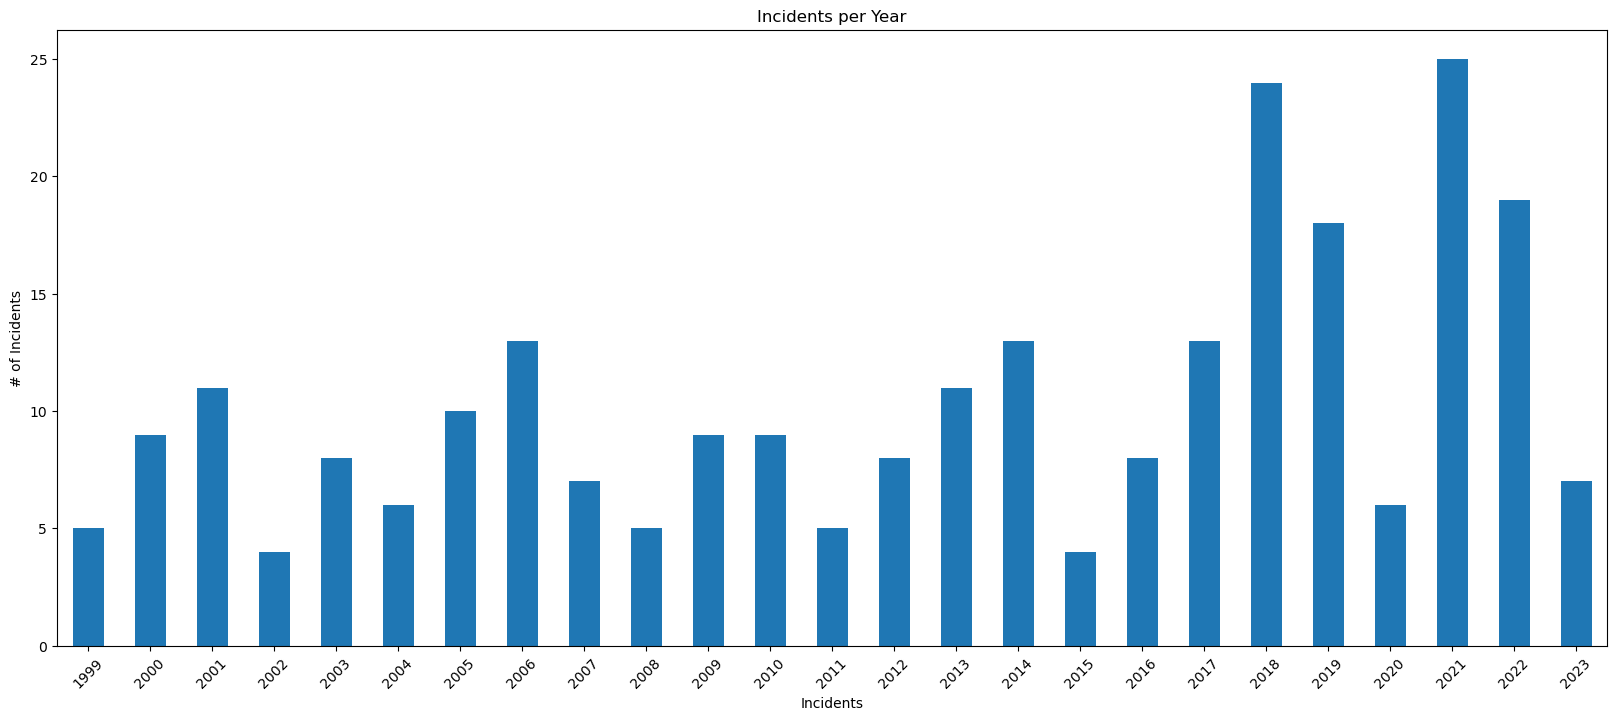

In [19]:
# Create a bar chart
annual_chart = count_year_incident.plot(kind="bar", figsize=(20,8))

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.xlabel("Incidents")
plt.ylabel("# of Incidents")
plt.title("Incidents per Year")

plt.show()